# Critical values of Quadratic with constraint ||x||=1 

We have the following quadratic form $Q(x)$:
$$\Large Q(x) = x^T H x $$

then 
$$\Large \lambda_m ||x||^2 \leq Q(x) \leq \lambda_M ||x||^2 $$

Where:
- $ x \in R^n $
- $ \lambda_m = \min_i \lambda_i $
- $ \lambda_M = \max_i \lambda_i $

Here, $ \lambda $ is an eigenvalue of $ H $.


## Proof Using Lagrange Multiplier
If $||x||=0$, $Q(x)=0$.

Assume $||x||\neq 0$
$$
\begin{eqnarray*}
&  & \lambda_m ||x||^2 \leq Q(x) \leq \lambda_M ||x||^2 \\
& \Longleftrightarrow &  \lambda_m \leq (x^T H x)/||x||^2 \leq \lambda_M \\ 
& \Longleftrightarrow & \lambda_m \leq u^T H u \leq \lambda_M \\ 
\end{eqnarray*}
$$

where $u = x/||x||$ is a unit vector.

So we'll show that 
$$\Large \text{for all $x$}(||x||=1), \quad \lambda_m \leq x^T H x \leq \lambda_M$$

### Constraint
Our constraint is:

$$ ||x||^2 = \sum_{i=1}^n x_i^2 = 1 $$

### Lagrange Function
We define the Lagrange function as:

$$ L(\lambda, x) = Q(x) - \lambda \left( \sum_{i=1}^n x_i^2 - 1 \right) $$

Now, let's find the critical points by taking the gradient:

$$
\begin{eqnarray*}
& &\nabla_x L = \nabla_x (x^T H x) - \lambda \nabla_x \left( \sum_{i=1}^n x_i^2 - 1 \right) = 0 \\
& \Longleftrightarrow  & \nabla_x (x^T H x) - \lambda \nabla_x (x^T I x - 1) = 0\\
& \Longleftrightarrow & (H + H^T) x - \lambda (I+ I^T) x = 0 \\
& \Longleftrightarrow & (H - \lambda I) x = 0 \\
 \end{eqnarray*}
$$

Solving for $ \lambda $ with the constraint $ \sum_{i=1}^n x_i^2 = 1 $ , we get:

$$
\lambda = \lambda_1, \ldots, \lambda_n \quad \text{and} \quad x = v_1, \ldots, v_n
$$

Where each $ \lambda_i $ is an eigenvalue of $ H $ and $ v_i $ is a unit eigenvector corresponding to it.

Each $v_i$ is a critical point of $ Q(x) $ with the constraint. We can express $ Q(v_i) $ as:

$$ Q(v_i) = v_i^T H v_i = v_i^T \lambda_i v_i = \lambda_i ||v_i||^2 = \lambda_i $$

So, we have:

$$ \lambda_m  \leq Q(x) \leq \lambda_M $$


# Plot the result of this problem 

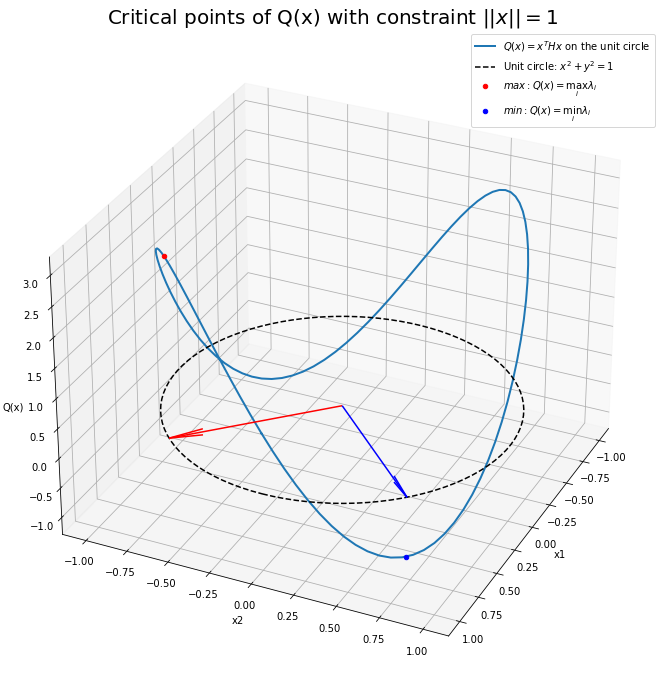

{'Eigenvalue 1': 3.0000000000000004, 'Eigenvector 1': array([ 0.70710678, -0.70710678])}
{'Eigenvalue 2': -0.9999999999999996, 'Eigenvector 2': array([0.70710678, 0.70710678])}


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the quadratic form Q(x) = x^T @ H @ x
H = np.array([[1, -2],
              [-2, 1]])

# Compute the eigenvalues and eigenvectors of H
eigenvalues, eigenvectors = np.linalg.eig(H)

# Normalize the eigenvectors
eigenvectors_normalized = eigenvectors / np.linalg.norm(eigenvectors, axis=0)

# Create a range of values for theta (angle in radians)
theta = np.linspace(0, 2 * np.pi, 100)
points_on_circle = np.array([np.cos(theta), np.sin(theta)])

# Create a 3D plot using ax and fig
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Plot the quadratic function Q(x) = x^T @ H @ x
X = points_on_circle[0]  # Use X and Y from points_on_circle
Y = points_on_circle[1]
Z = np.zeros_like(X)  # Initialize Z with zeros

for i in range(len(X)):
    x_vec = np.array([X[i], Y[i]])
    Z[i] = x_vec.T @ H @ x_vec

# Plot the quadratic surface with a thicker line
ax.plot(X, Y, Z, label='$Q(x)=x^T H x$ on the unit circle', linewidth=2.0)

# the unit circle
ax.plot(X, Y, 0, c='black', linewidth=1.5, linestyle='dashed', label='Unit circle: $x^2 + y^2 = 1$')


# Plot the unit eigenvectors as arrows with enlarged heads
colors = ['r', 'b']
origin = np.zeros(2)
for i in range(len(eigenvalues)):
    ax.quiver(
        origin[0], origin[1], 0,
        eigenvectors_normalized[0, i], eigenvectors_normalized[1, i], 0,
        color=colors[i],
        pivot='tail',
        arrow_length_ratio=0.2
    )
    # plot local minimum and maximum values on the circle
    if i == eigenvalues.argmax():
        label = '$max: Q(x)= \max_i \lambda_i$'
    elif i == eigenvalues.argmin():
        label = '$min: Q(x)= \min_i \lambda_i$'
    else:
        label = '$Q(x)= \lambda$'
    ax.scatter(eigenvectors_normalized[0, i], eigenvectors_normalized[1, i], eigenvalues[i], color=colors[i], label=label)

# Label axes and set plot title
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Q(x)')
ax.view_init(elev=30, azim=25)
ax.legend()
ax.set_title('Critical points of Q(x) with constraint $||x||=1$ ', fontsize=20)

# Show the plot
plt.show()

# Print the eigenvalues and eigenvectors
for i in range(len(eigenvalues)):
    result = {f"Eigenvalue {i+1}": eigenvalues[i],
             f"Eigenvector {i+1}": eigenvectors[:, i]
             }
    print(result)



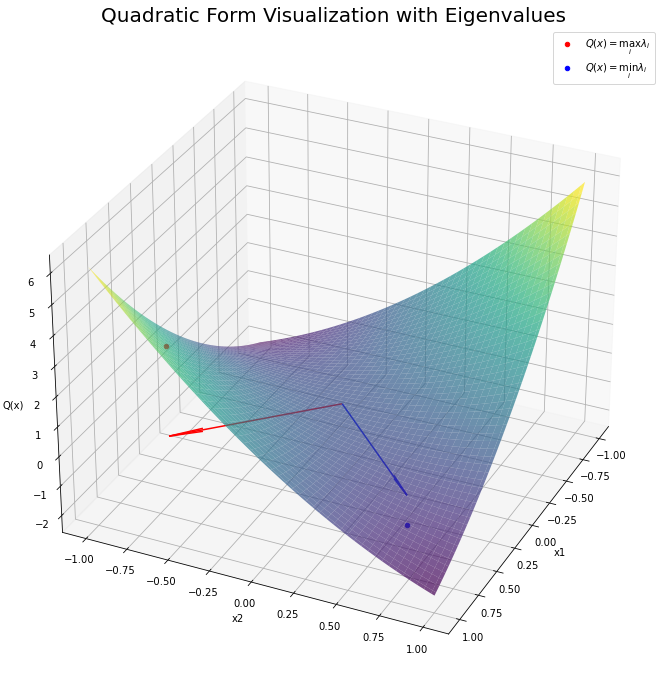

{'Eigenvalue 1': 3.0000000000000004, 'Eigenvector 1': array([ 0.70710678, -0.70710678])}
{'Eigenvalue 2': -0.9999999999999996, 'Eigenvector 2': array([0.70710678, 0.70710678])}


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the quadratic form Q(x) = x^T @ H @ x
H = np.array([[1, -2],
              [-2, 1]])

# Compute the eigenvalues and eigenvectors of H
eigenvalues, eigenvectors = np.linalg.eig(H)

# Normalize the eigenvectors
eigenvectors_normalized = eigenvectors / np.linalg.norm(eigenvectors, axis=0)

# Create a range of values for theta (angle in radians)
theta = np.linspace(0, 2 * np.pi, 100)
points_on_circle = np.array([np.cos(theta), np.sin(theta)])

# Create a 3D plot using ax and fig
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Plot the quadratic function Q(x) = x^T @ H @ x
X = np.linspace(-1, 1, 100)
Y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(X, Y)
Z = np.zeros_like(X)
for i in range(len(X)):
    for j in range(len(Y)):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = x.T @ H @ x

# Plot the 3D surface
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

# Plot the unit eigenvectors as arrows with enlarged heads
colors = ['r', 'b']
origin = np.zeros(2)
for i in range(len(eigenvalues)):
    ax.quiver(
        origin[0], origin[1], 0,
        eigenvectors_normalized[0, i], eigenvectors_normalized[1, i], 0,
        color=colors[i],
        pivot='tail',  
        arrow_length_ratio=0.2
    )
    # plot local minimum and maximum values on the circle
    if i == eigenvalues.argmax():
        label = '$Q(x)= \max_i \lambda_i$'
    elif i == eigenvalues.argmin():
        label = '$Q(x)= \min_i \lambda_i$'
    else:
        label = '$Q(x)= \lambda$'
    ax.scatter(eigenvectors_normalized[0, i], eigenvectors_normalized[1, i], eigenvalues[i], color=colors[i], label=label)

# Label axes and set plot title
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Q(x)')
ax.view_init(elev=30, azim=25)
ax.legend()
ax.set_title('Quadratic Form Visualization with Eigenvalues', fontsize=20)

# Show the plot
plt.show()

# Print the eigenvalues and eigenvectors
for i in range(len(eigenvalues)):
    result = {f"Eigenvalue {i+1}": eigenvalues[i],
             f"Eigenvector {i+1}": eigenvectors[:, i]
             }
    print(result)

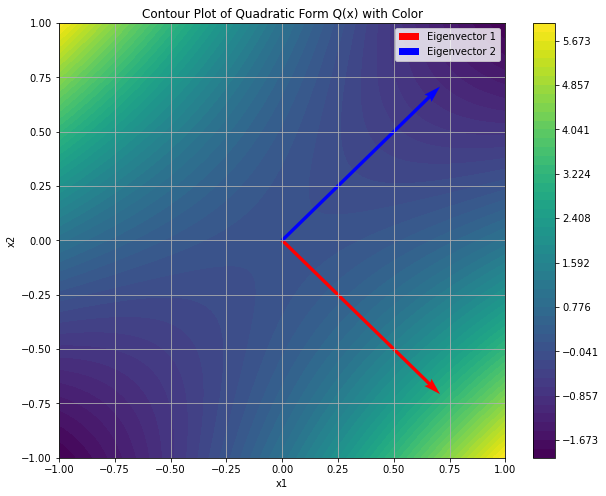

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the quadratic form Q(x) = x^T @ H @ x
H = np.array([[1, -2],
              [-2, 1]])

# Compute the eigenvalues and eigenvectors of H
eigenvalues, eigenvectors = np.linalg.eig(H)

# Normalize the eigenvectors
eigenvectors_normalized = eigenvectors / np.linalg.norm(eigenvectors, axis=0)

# Create a range of values for x1 and x2
x1 = np.linspace(-1, 1, 100)
x2 = np.linspace(-1, 1, 100)
X1, X2 = np.meshgrid(x1, x2)

# Compute the quadratic form for the grid
Z = np.zeros_like(X1)
for i in range(len(x1)):
    for j in range(len(x2)):
        x = np.array([X1[i, j], X2[i, j]])
        Z[i, j] = x.T @ H @ x

# Create a filled contour plot with a colormap
plt.figure(figsize=(10, 8))
contour_levels = np.linspace(Z.min(), Z.max(), 50)
contour = plt.contourf(X1, X2, Z, levels=contour_levels, cmap='viridis')
plt.colorbar(contour)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Contour Plot of Quadratic Form Q(x) with Color')
plt.grid(True)

# Plot the eigenvectors as arrows
colors = ['r', 'b']
for i, (eigenvalue, vector, color) in enumerate(zip(eigenvalues, eigenvectors_normalized.T, colors)):
    plt.quiver(0, 0, vector[0], vector[1], color=color, angles='xy', scale_units='xy', scale=1, label=f'Eigenvector {i+1}')

# Add a legend
plt.legend()

# Show the plot
plt.show()


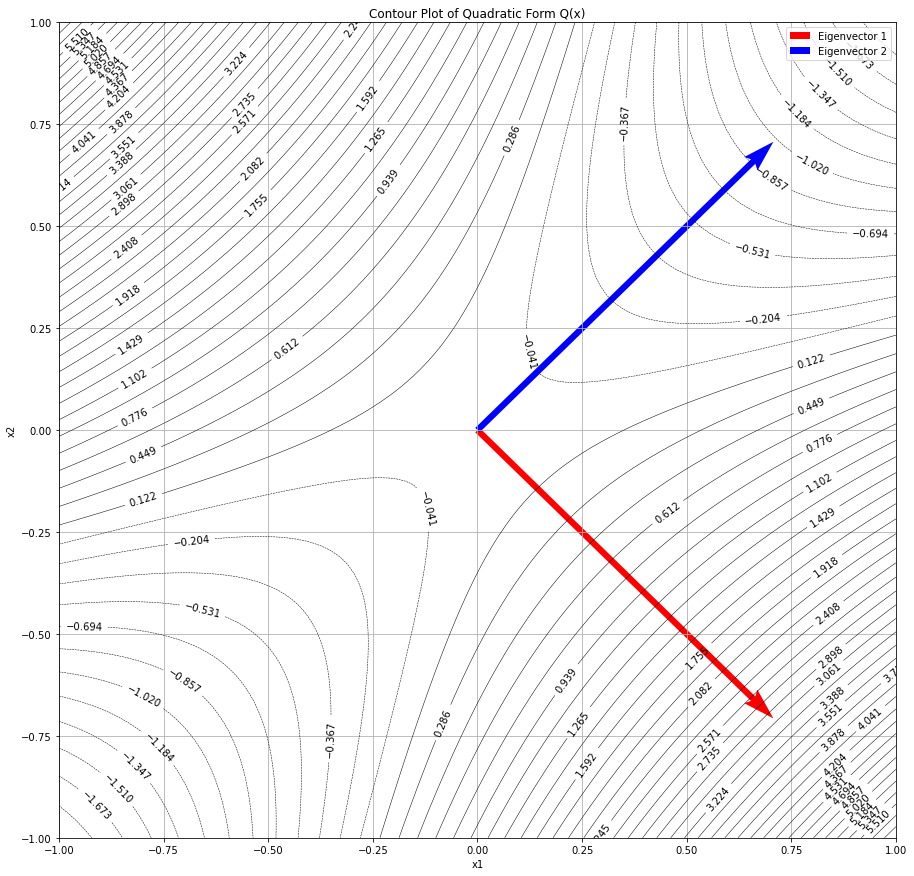

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the quadratic form Q(x) = x^T @ H @ x
H = np.array([[1, -2],
              [-2, 1]])

# Compute the eigenvalues and eigenvectors of H
eigenvalues, eigenvectors = np.linalg.eig(H)

# Normalize the eigenvectors
eigenvectors_normalized = eigenvectors / np.linalg.norm(eigenvectors, axis=0)

# Create a range of values for x1 and x2
x1 = np.linspace(-1, 1, 100)
x2 = np.linspace(-1, 1, 100)
X1, X2 = np.meshgrid(x1, x2)

# Compute the quadratic form for the grid
Z = np.zeros_like(X1)
for i in range(len(x1)):
    for j in range(len(x2)):
        x = np.array([X1[i, j], X2[i, j]])
        Z[i, j] = x.T @ H @ x

# Create a contour plot
plt.figure(figsize=(15, 15))
contour_levels = np.linspace(Z.min(), Z.max(), 50)
contour = plt.contour(X1, X2, Z, levels=contour_levels, colors='k', linewidths=0.5)
plt.clabel(contour, inline=1, fontsize=10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Contour Plot of Quadratic Form Q(x)')
plt.grid(True)

# Plot the eigenvectors as arrows
colors = ['r', 'b']
for i, (eigenvalue, vector, color) in enumerate(zip(eigenvalues, eigenvectors_normalized.T, colors)):
    plt.quiver(0, 0, vector[0], vector[1], color=color, angles='xy', scale_units='xy', scale=1, label=f'Eigenvector {i+1}')

# Add a legend
plt.legend()

# Show the plot
plt.show()
